In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [27]:
from google.colab import files
uploaded = files.upload()


Saving real_estate_clean.csv to real_estate_clean (1).csv


In [28]:
# Cargar datos
df = pd.read_csv("real_estate_clean.csv")

# Mostrar las primeras filas
df.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [29]:
df.columns


Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [30]:
# Renombrar columnas para simplificar
df.columns = ['No', 'TransactionDate', 'HouseAge', 'DistanceToMRT', 'ConvenienceStores', 'Latitude', 'Longitude', 'PricePerUnit']

# Eliminar columna "No" que no aporta
df.drop(columns=['No'], inplace=True)


In [31]:
X = df[['TransactionDate', 'HouseAge', 'DistanceToMRT', 'ConvenienceStores', 'Latitude', 'Longitude']]
y = df['PricePerUnit']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Modelo de Regresión Lineal Múltiple**

In [32]:
# Crear modelo
lr_model = LinearRegression()

# Entrenar modelo
lr_model.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr_model.predict(X_test)

# Evaluación
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("🔹 Regresión Lineal")
print("MSE:", mse_lr)
print("R²:", r2_lr)


🔹 Regresión Lineal
MSE: 60.97637965746742
R²: 0.6309164822754011


**Modelo Red Neuronal(RNA)**

In [9]:
# Crear modelo secuencial
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))  # Capa de salida

# Compilar modelo
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar modelo
history = nn_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Predicciones
y_pred_nn = nn_model.predict(X_test).flatten()

# Evaluación
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("🔹 Red Neuronal Artificial")
print("MSE:", mse_nn)
print("R²:", r2_nn)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
🔹 Red Neuronal Artificial
MSE: 30.181989968604327
R²: 0.05430079998106485


**predicciones nuevas**

In [33]:
# Tomamos 5 muestras aleatorias del conjunto de prueba
X_new = X_test.sample(5, random_state=1)

# Predicciones con ambos modelos
preds_lr = lr_model.predict(X_new)
preds_nn = nn_model.predict(X_new).flatten()

# Mostrar resultados
pred_df = pd.DataFrame({
    'Real': y_test.loc[X_new.index],
    'Predicción_LR': preds_lr,
    'Predicción_RNA': preds_nn
})
print(pred_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
     Real  Predicción_LR  Predicción_RNA
118  48.6      45.724767       35.138149
33   22.9      30.325355       31.107468
332  30.8      33.661584       35.358959
140  45.1      14.986237        1.767540
94   38.2      44.327459       76.860878


**Comparar modelos**

In [34]:
print(" Comparación de Modelos")
print(f"Regresión Lineal - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Red Neuronal - MSE: {mse_nn:.2f}, R²: {r2_nn:.2f}")


 Comparación de Modelos
Regresión Lineal - MSE: 60.98, R²: 0.63
Red Neuronal - MSE: 30.18, R²: 0.05


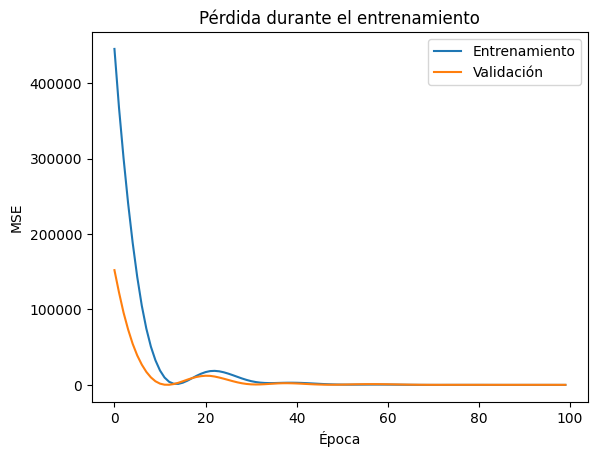

In [35]:
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()
plt.show()
